<a href="https://colab.research.google.com/github/PrakashBaire/ANN_CNN_Deep_Learning/blob/main/Car_VS_Dogs_CNN_JupyterNoteBook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten


#train_dir = 'C:\Users\praka\OneDrive\Documents\ML_Practice\dataset\dataset\training_set'http://localhost:8888/tree/OneDrive/Documents/ML_Practice/dataset/dataset/training_set
#test_dir = 'C:\Users\praka\OneDrive\Documents\ML_Practice\dataset\dataset\test_set'

In [ ]:
#train_dir = 'C:/Users/praka/OneDrive/Documents/ML_Practice/dataset/dataset/training_set'
#test_dir = 'C:/Users/praka/OneDrive/Documents/ML_Practice/dataset/dataset/test_set'

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'C:/Users/praka/OneDrive/Documents/ML_Practice/dataset/dataset/training_set' ,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(64, 64),
)


Found 8000 files belonging to 2 classes.


In [ ]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'C:/Users/praka/OneDrive/Documents/ML_Practice/dataset/dataset/test_set' ,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(64, 64),
)


Found 2000 files belonging to 2 classes.


In [ ]:
#Normalization
def process(image,label):
    image = tf.cast(image/255. , tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))



In [ ]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = cnn.fit(train_ds, validation_data = validation_ds, epochs = 25)

Epoch 1/25
250/250 [==============================] - 40s 151ms/step - loss: 0.6218 - accuracy: 0.6611 - val_loss: 0.5696 - val_accuracy: 0.7140
Epoch 2/25
250/250 [==============================] - 39s 154ms/step - loss: 0.5445 - accuracy: 0.7301 - val_loss: 0.5338 - val_accuracy: 0.7375
Epoch 3/25
250/250 [==============================] - 40s 159ms/step - loss: 0.4994 - accuracy: 0.7571 - val_loss: 0.5064 - val_accuracy: 0.7620
Epoch 4/25
250/250 [==============================] - 38s 151ms/step - loss: 0.4563 - accuracy: 0.7831 - val_loss: 0.5111 - val_accuracy: 0.7575
Epoch 5/25
250/250 [==============================] - 39s 154ms/step - loss: 0.4229 - accuracy: 0.8026 - val_loss: 0.5044 - val_accuracy: 0.7705
Epoch 6/25
250/250 [==============================] - 38s 153ms/step - loss: 0.3858 - accuracy: 0.8235 - val_loss: 0.5481 - val_accuracy: 0.7460
Epoch 7/25
250/250 [==============================] - 39s 155ms/step - loss: 0.3474 - accuracy: 0.8441 - val_loss: 0.5268 - val_ac

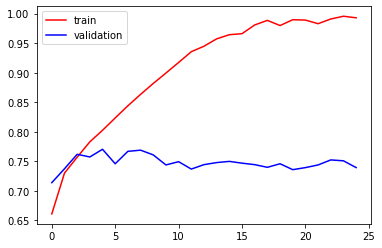

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

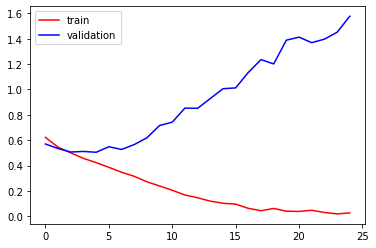

In [ ]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()